<font color='red'> 
# Computational Statistics for Data Analysis
<font\>

# Index

### 3 Probabilities. 
* 3.1 Probability rules
* 3.2 Monte Carlo
* 3.3 Continuous distributions

The most common definition of **probability** is a *frequency expressed as a fraction* of the universe of possible outcomes. 

    Thus, it is a real value between 0 and 1 that is intended to be a measure corresponding to the idea that some things are more likely than others.

**Frequentism** because it defines probability in terms of frequencies.

An alternative is **Bayesianism**, which defines probability as a degree of belief that an event will occur.

    - Example: What is the probability that Thaksin Shinawatra is the Prime Minister of Thailand?

The *things* we assign probabilities are called **events**, $E$.  A *situation* where $E$ might or might not happen is called a **trial**.

   In the case of a six-sided die, each roll is called a **trial**. If we want to compute $P(6)$, each time a 6 appears is called a **success**. Other trials are called **failures**. 

If in a *finite series of $n$ identical trials* we observe $s$ successes, the **probability of the success** is $s/n$.



## 3.1 Probability Rules 

A rule that is not always true: $P(A \mbox{ and } B) = P(A) P(B)$. 

It is true, when $A$ and $B$ are **independent**. 
$A$ and $B$ are **independent** if the fact that $A$ occurred, does not change the probability of $B$ and viceversa. Trials corresponding to tossing a coin are independent. 

A rule that is true when $A$ and $B$ are **not independent**: 

$$ P(A|B) = \frac{P(A \mbox{ and } B)}{P(B)}$$

From that we can derive: 

$$P(A \mbox{ and } B) = P(A) P(B|A) = P(B) P(A|B)$$

**Exercises**: 
+ If I have two children, what is the probability to have 2 girls?
+ If I have two children and we know that at least one of them is a girl, what is the probability that they are two girls?
+ If I have two children and we know that the older one is a girl, what is the probability that they are two girls?

In [1]:
## Your solutions

### More probability rules

We say that two events are **mutually exclusive** if:

$$ P(A | B) = P(B | A) = 0 $$

In this case it is easy to show that:

$$ P(A \mbox{ or } B) = P(A) + P(B)$$

If $A$ and $B$ are not mutually exclusive:

$$ P(A \mbox{ or } B) = P(A) + P(B) - P(A \mbox{ and } B) $$

**Exercises**: Counting is the most basic skill to solve probability problems.

+ Q: For example, if I flip two coins, the chance of getting at least one tails is: 1/2 + 1/2?!
+ Q: If I roll two dice and the total is 8, what is the probability that one of the dice is 6?
+ Q: If I roll 100 dice, what is the probability of getting all sixes? 
+ Q: What is the probability of getting no sixes?
+ Q: What is the probability of getting at least one six?
+ Q: If I have two children, what is the probability that they are two girls?

In [2]:
#Your solution here

## 3.2 Binomial distribution

More generally, the probability distribution that represents the probability of getting $k$ times a success with probability $p$ in $n$ trials is:

$$ PMF(k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where ${n \choose k} = \frac{n!}{k!(n-k)!}$. This is called **binomial distribution**.

What is the probability of having 2 successes in 5 trials?

In [3]:
import scipy.misc as sc
n = 5
k = 2
sc.comb(n, k, exact=True) # Chances of 2 successes in 5 trials

10

What is the probability of having 5 heads in 9 trials?

In [4]:
# chances of 5 heads in 9 tosses

a = sc.comb(9, 5, exact=True)
print('The combinations of 9 on 5 are: ', a)

The combinations of 9 on 5 are:  126


In [5]:
p = 0.5
print('Prob: ', a * p**5 * (1-p)**4)

Prob:  0.24609375


What is the probability of having 6 sixes in 9 trials?

In [6]:
#  Your solution here
a = sc.comb(9, 6, exact=True)
print('The combinations of 9 on 6 are: ', a)
p = 1/6.0
print('Prob: ', a * p**6 * (1-p)**3)

The combinations of 9 on 6 are:  84
Prob:  0.0010419048163389725


## 3.3 Monte Carlo Experiments

**Monte Carlo experiments** are a broad class of computational algorithms that rely on *repeated random sampling to obtain numerical results*. Typically, one runs simulations many times over and over in order to obtain the distribution of an unknown probabilistic entity. (*Source: Wikipedia*)

**Trivial case**: What are the chances of getting a six in one trial?

In [7]:
import random
import sys
N = 1000000 # perform N experiments
M = 0 # number of times, we got 6
for i in range(N):
    outcome = random.randint(1, 6)
    if outcome == 6:
        M += 1
Prob=M/float(N)
print('I got six %d times out of %d' % (M, N), '; Prob = ', 
      Prob, 'Note that: 1/6=', 1/6.0)

I got six 167037 times out of 1000000 ; Prob =  0.167037 Note that: 1/6= 0.16666666666666666


What are the chances of getting a six in two trials?

In [8]:
#  chances of (exactly) 1 six in 2 trials

a = sc.comb(2, 1, exact=True)
p = 1/6.0
print('Prob: ', a * p * (1-p))

Prob:  0.2777777777777778


In [9]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
for i in range(N):
    outcome1 = random.randint(1, 6)
    outcome2 = random.randint(1, 6)
    if (outcome1 == 6 and outcome2 !=6) or (outcome1 != 6 and outcome2 == 6):
        M += 1
print('I got one six %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

I got one six 2809 times out of 10000 ; Prob =  0.2809


**Exercise**: You throw two dice, one black and one red. What is the probability
that the number of eyes on the black die is larger than the number of
eyes on the red die?

In [10]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
for i in range(N):
    outcome1 = random.randint(1, 6)
    outcome2 = random.randint(1, 6)
    if (outcome1 > outcome2):
        M += 1
print('I got one six %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

I got one six 4191 times out of 10000 ; Prob =  0.4191


**A more interesting case:** If I roll a dice 100 times, what is the chance of getting at least 6 sixes in a row?

In [11]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
T = 100
success='666666'
for i in range(N):
    outcome=''
    for i in range(T):
        outcome=outcome+str(random.randint(1,6))
#    print(outcome)
    if (success in outcome):
            M += 1
print('I got 6 sixes in a row %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

I got 6 sixes in a row 17 times out of 10000 ; Prob =  0.0017


**Exercise**: What is the probability that Messi scores at least 1 goal in a row of 10 matches during a season? (Let's suppose that each match is an independent trial).

**Data**: Messi scores 0.83 goals per match (323 goals in 387 matches) and CR4 scores 0.62 (329 goals in 527 matches) goals per match.
There are 42 matches in a season. 

<small>(Source: https://es.answers.yahoo.com/question/index?qid=20130928103148AAFQHsC)</small>

In [12]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
T = 42
Messi_score=0.83
Cristiano_score=0.62
success='1111111111'
for i in range(N):
    outcome=''
    for i in range(T):
        res=random.random()
        if res<Cristiano_score:
            outcome=outcome+'1'
        else: outcome=outcome+'0'
    if (success in outcome):
            M += 1
print('Cristiano got scores at least 1 goal in a row of 10 matches during a season %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

Cristiano got scores at least 1 goal in a row of 10 matches during a season 1089 times out of 10000 ; Prob =  0.1089


## 3.4 Continous distributions

So far, we have built **empirical distributions** (which represent the distributions of values in a sample), based on observations, but many real problems are well approximated by fitting **continous distributions functions (CDF)**. 

They are called in this way because the distribution is described by an analytic continuous function.

**Why continous models?**
- Abstractions that leave out irrelevant details.
- Data compression.
- Generating random numbers.
- Comparing distributions.
- Related to a natural phenomenon -> insight.

### 3.4.1 The exponential distribution

The CDF of the exponential distribution is:

$$ CDF(x) = 1 -  \exp^{- \lambda x}$$ 

The derivative of a CDF is called a **probability density function**, or PDF.
The PDF of the exponential distribution is:

$$ PDF(x) = \lambda \exp^{- \lambda x}$$

The parameter $\lambda$ determines the shape of the distribution, the mean of the distribution is $1/\lambda$ and its variance is $1/\lambda^2$. The median is $ln(2)/\lambda$.

**Note**: The PDF is defined only for continuous random variables.The values that are given are a range of possible values that gives the probability of the random variable that falls within that range. For example, what is the weight of females in California from the ages of eighteen to twenty-five.



<center><img src='images/PDF CDF.png'></center>

In real applications, exponential distributions appear when we have a series of events and estimate the events times, called **interarrival times**. When the events are *equally likely* to occur at any time, the interarrival times distribution used to get exponential distribution.

As an example, the following figure shows the CDF of the interarrival times of birth in an Australian hospital. 44 births were registered in 24 hours, so the rate is $\lambda=0.0306$ births/minute. The mean of the exponential distribution is $1/\lambda$, so the mean time between births is 32.7 minutes. How do you get them?

<center><img src='images/interarrivaltimes.png'></center>

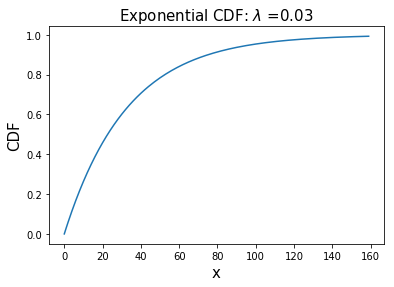

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l = 0.0306
x=np.arange(0,160,1)
y= 1 - np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

Visualize the CDF of the Australian birhts.

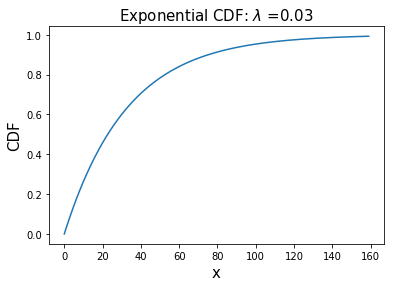

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l = 0.030555555555555555
x=np.arange(0,160,1)
y= 1 - np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

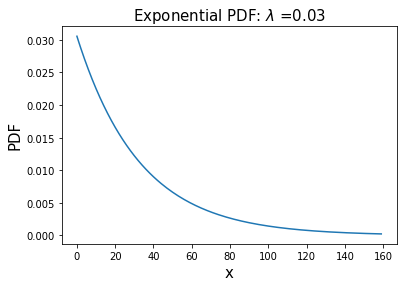

In [16]:
from __future__ import division
import numpy as np
import scipy.stats as stats

l = 0.030555555555555555
x=np.arange(0,160,1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ =%.2f' % l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

There are a lot of real world events that can be described with this distribution.
* The time until a radioactive particle decays,
* The time it takes before your next telephone call,
* The time until default (on payment to company debt holders) in reduced form credit risk modeling.


The random variable $X$ of the lifelengths of some batteries is associated with a probability density function of the form:

$$ PDF(x) = \frac{1}{4} \exp^{- \frac{x}{4}}$$ 

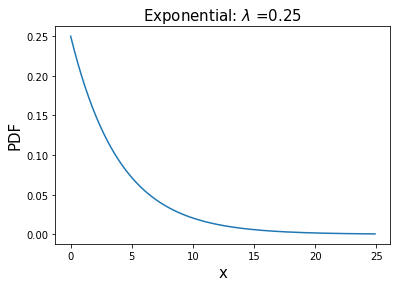

In [17]:
l = 0.25
x=np.arange(0,25,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('PDF',fontsize=15)
plt.show()

### 5. Main reference
*Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.
http://www.greenteapress.com/thinkstats/